![](19.05.2022_07.07.43_REC.png)

## Understanding the raw data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Train_aBjfeNk.csv')

In [4]:
#Checking the No. of rows & columns

print('Shape of the data set(No. of rows, No. of columns):', df.shape)

Shape of the data set(No. of rows, No. of columns): (8068, 11)


## Data Warngling

### Insights after cleaning the data:

- Gender: I can convert the column into two groups [male-female] to plot it latter w.r.t other variables
- Profession: I can do the same, but since there's around 124 null values in this column, we can't relay deeply on its outputs especially that the column values are texts, we can't simply use any method of filling the missing/empty values.

- **Strong opportunities to design my analysis:**

Gender - Age - Spending Score - Segmentation

- **Medium opportunities to design analysis:**

Graduated - Profession - Var_1 - Ever_Married

- **Least opportunities to design analysis: [Nearly we can remove them from the analysis]**

Family_Size - Work_Experience

### Techniques I used in this project:

- **Data Wrangling section:**

Hot-Encoding - 

- Packages:
Pandas - Numpy - MatPlotLib - Seaborn

In [5]:
#Checking the null values
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
#Identify the data set variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [8]:
#Checking if there are any duplicates
df.duplicated(keep=False).sum()


0

In [9]:

#df.hist()

In [10]:
data = pd.get_dummies(df['Profession'])
data

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0,0,0,0,0,0
8064,0,0,0,0,1,0,0,0,0
8065,0,0,0,0,0,1,0,0,0
8066,0,0,0,0,0,1,0,0,0


In [13]:
new_df = pd.concat([data, df], axis = 1)
new_df

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,0,0,0,1,0,0,0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,0,0,1,0,0,0,0,0,0,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,0,0,1,0,0,0,0,0,0,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,0,0,0,0,0,0,0,1,0,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,0,0,0,1,0,0,0,0,0,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,0,0,0,0,0,0,0,0,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,0,0,0,0,1,0,0,0,0,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,0,0,0,0,0,1,0,0,0,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,0,0,0,0,0,1,0,0,0,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [16]:
#Drop the original Profession column
new_df = new_df.drop('Profession', 1)

/tmp/ipykernel_81642/3732367441.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = new_df.drop('Profession', 1)


In [17]:
#Still the same null values after the merging process
new_df.isna().sum()

Artist               0
Doctor               0
Engineer             0
Entertainment        0
Executive            0
Healthcare           0
Homemaker            0
Lawyer               0
Marketing            0
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [21]:
def function(arg):
    new_df[arg].hist()

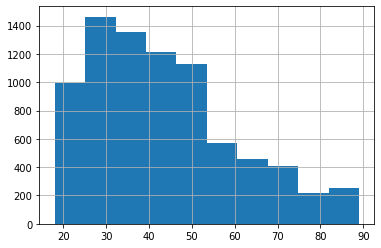

In [23]:
function('Age')

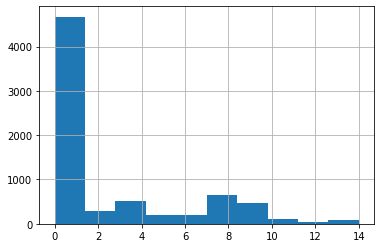

In [24]:
function('Work_Experience')

- !pip install wordcloud
- !pip install scipy
- !pip install Pillow
